In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
DATASET_FILE_INTERPOLATION = "/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/full_results.csv"
DATASET_FILE_NO_INTERPOLATION = "/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/full_results.csv"

def display_color_mesh(tbl, title, save = None):
    pcm = plt.pcolormesh(range(tbl.shape[1]), range(tbl.shape[0]), tbl, vmin=np.nanmin(tbl), vmax=np.nanmax(tbl))
    plt.yticks(ticks=range(tbl.shape[0]), labels=row_dict.keys())
    plt.xticks(ticks=range(tbl.shape[1]), labels=col_dict.keys())
    plt.xlabel('M')
    plt.ylabel('K')
    plt.title(title)
    plt.colorbar(pcm)
    if save != None:
        plt.savefig(save)
    plt.show()
    

def display_score_by_index_size(scores, scores_baseline, index_sizes, index_sizes_baseline, title, ylabel, save = None, alpha_label='0.3'):
    scores_linear = scores.flatten()
    index_sizes_linear = index_sizes.flatten()

    scores_baseline_linear = scores_baseline.flatten()
    index_sizes_baseline_linear = index_sizes_baseline.flatten()
    
    plt.scatter(index_sizes_linear, scores_linear, label=f'alpha={alpha_label}')
    plt.scatter(index_sizes_baseline_linear, scores_baseline_linear, label='alpha=0.0')
    plt.legend()
    plt.xlabel('Index Size (MB)')
    plt.ylabel(ylabel)
    plt.title(title)
    if save != None:
        plt.savefig(save)
    plt.show()


def display_score_by_index_size_with_lines(scores, scores_baseline, index_sizes, index_sizes_baseline, title, ylabel, lines, limits, save = None, alpha_label='0.3'):
    for line in lines:
        plt.axhline(y=line[0], color=line[2], linestyle=line[3], label=line[1])

        if line[4]:
            plt.annotate(line[1], (60, line[0]), xytext=(5, 5), textcoords="offset points", ha="left", va="bottom")

    plt.ylim(limits[0], limits[1])
    scores_linear = scores.flatten()
    index_sizes_linear = index_sizes.flatten()

    scores_baseline_linear = scores_baseline.flatten()
    index_sizes_baseline_linear = index_sizes_baseline.flatten()
    
    plt.scatter(index_sizes_linear, scores_linear, label=f'alpha={alpha_label}')
    plt.scatter(index_sizes_baseline_linear, scores_baseline_linear, label='alpha=0.0')
    plt.legend()
    plt.xlabel('Index Size (MB)')
    plt.ylabel(ylabel)
    plt.title(title)
    if save != None:
        plt.savefig(save)
    plt.show()

In [3]:
data_no_interpolation = pd.read_csv(DATASET_FILE_NO_INTERPOLATION)
data_interpolation = pd.read_csv(DATASET_FILE_INTERPOLATION)
data = pd.concat([data_no_interpolation, data_interpolation])

In [5]:
data

,Unnamed: 0,Model,M,K,Training Sample Size,Training Sample Size (%),Alpha,nDCG@10,AP@1000,RR@10,Dense Index Size (MB),Unnamed: 0.1
0,0,BM25 + AggretrieverPQ,16,256,200000,2.27%,0.0,0.255531,0.216782,0.204802,169.395,NaN
1,1,BM25 + AggretrieverPQ,16,512,200000,2.27%,0.0,0.284636,0.236008,0.227924,187.009,NaN
2,2,BM25 + AggretrieverPQ,16,4096,200000,2.27%,0.0,0.296122,0.250069,0.238086,248.103,NaN
3,3,BM25 + AggretrieverPQ,16,2048,200000,2.27%,0.0,0.310618,0.264176,0.259459,225.238,NaN
4,4,BM25 + AggretrieverPQ,16,1024,200000,2.27%,0.0,0.289692,0.243629,0.235030,205.374,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
135,15,BM25 + AggretrieverPQ,8,4096,200000,2.27%,0.3,0.304744,0.252335,0.250562,146.916,15.0
136,16,BM25 + AggretrieverPQ,8,2048,200000,2.27%,0.1,0.275610,0.235446,0.226668,132.484,16.0
137,17,BM25 + AggretrieverPQ,8,2048,200000,2.27%,0.3,0.293729,0.246554,0.240105,132.484,17.0
138,18,BM25 + AggretrieverPQ,8,1024,200000,2.27%,0.1,0.264813,0.225475,0.217268,121.051,18.0


# BM25 + AggretrieverPQ - Analysis

In [4]:
data_bm25_agg = data[(data["Model"] == "BM25 + AggretrieverPQ") & (data["Alpha"] == 0.3)]
row_dict = {'256': 0, '512': 1, '1024': 2, '2048': 3, '4096': 4}
col_dict = {'8': 0, '16': 1, '24': 2, '32': 3, '48': 4, '64': 5, '96': 6}
ndcg_scores = np.zeros((5, 7))
rr_scores = np.zeros_like(ndcg_scores)
ap_scores = np.zeros_like(ndcg_scores)
index_sizes = np.zeros_like(ndcg_scores)

for (idx, row) in data_bm25_agg.iterrows():
    tbl_row = row_dict[str(row.K)]
    tbl_col = col_dict[str(row.M)]

    ndcg_scores[tbl_row, tbl_col] = row['nDCG@10'] if row['nDCG@10'] >= 0 else None
    rr_scores[tbl_row, tbl_col] = row['RR@10'] if row['RR@10'] >= 0 else None
    ap_scores[tbl_row, tbl_col] = row['AP@1000'] if row['AP@1000'] >= 0 else None
    index_sizes[tbl_row, tbl_col] = row['Dense Index Size (MB)'] if row['Dense Index Size (MB)'] >= 0 else None

In [5]:
data_bm25_agg_baseline = data[(data["Model"] == "BM25 + AggretrieverPQ") & (data["Alpha"] == 0.0)]
row_dict_baseline = {'256': 0, '512': 1, '1024': 2, '2048': 3, '4096': 4}
col_dict_baseline = {'8': 0, '16': 1, '24': 2, '32': 3, '48': 4, '64': 5, '96': 6}
ndcg_scores_baseline = np.zeros((5, 7))
rr_scores_baseline = np.zeros_like(ndcg_scores_baseline)
ap_scores_baseline = np.zeros_like(ndcg_scores_baseline)
index_sizes_baseline = np.zeros_like(ndcg_scores_baseline)

for (idx, row) in data_bm25_agg_baseline.iterrows():
    tbl_row = row_dict_baseline[str(row.K)]
    tbl_col = col_dict_baseline[str(row.M)]

    ndcg_scores_baseline[tbl_row, tbl_col] = row['nDCG@10'] if row['nDCG@10'] >= 0 else None
    rr_scores_baseline[tbl_row, tbl_col] = row['RR@10'] if row['RR@10'] >= 0 else None
    ap_scores_baseline[tbl_row, tbl_col] = row['AP@1000'] if row['AP@1000'] >= 0 else None
    index_sizes_baseline[tbl_row, tbl_col] = row['Dense Index Size (MB)'] if row['Dense Index Size (MB)'] >= 0 else None

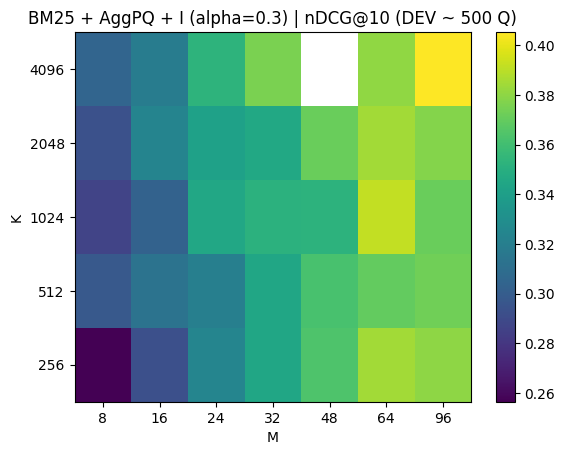

In [24]:
display_color_mesh(ndcg_scores, 'BM25 + AggPQ + I (alpha=0.3) | nDCG@10 (DEV ~ 500 Q)', 
                   save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_aggpq_ndcg10_grid.png')

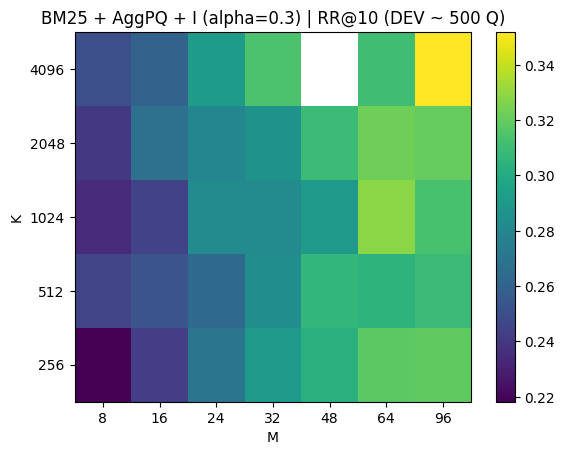

In [25]:
display_color_mesh(rr_scores, 'BM25 + AggPQ + I (alpha=0.3) | RR@10 (DEV ~ 500 Q)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_aggpq_rr10_grid.png')

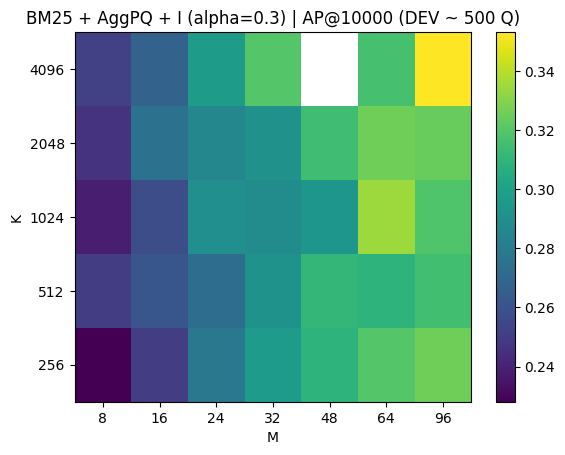

In [26]:
display_color_mesh(ap_scores, 'BM25 + AggPQ + I (alpha=0.3) | AP@10000 (DEV ~ 500 Q)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_aggpq_ap1000_grid.png')

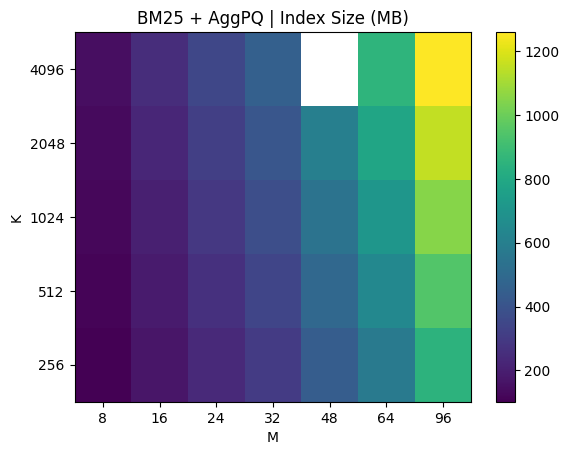

In [27]:
display_color_mesh(index_sizes, 'BM25 + AggPQ | Index Size (MB)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_aggpq_index_size_grid.png')

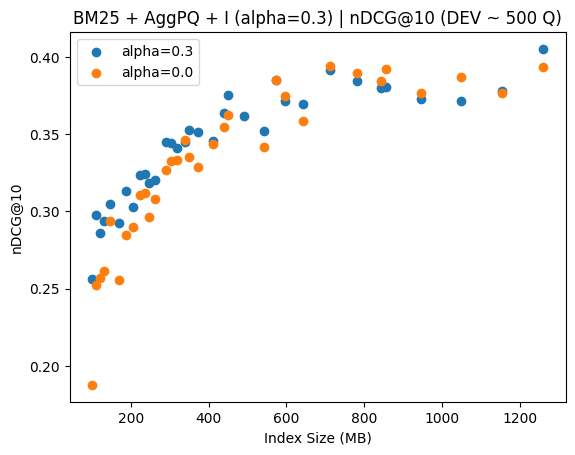

In [32]:
display_score_by_index_size(ndcg_scores, ndcg_scores_baseline, index_sizes, index_sizes_baseline, 'BM25 + AggPQ + I (alpha=0.3) | nDCG@10 (DEV ~ 500 Q)', 'nDCG@10',
                           save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_aggpq_ndcg10_plot.png')

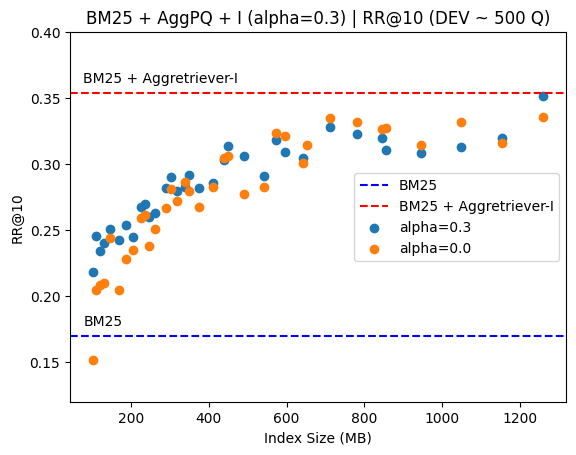

In [31]:
display_score_by_index_size_with_lines(rr_scores, rr_scores_baseline, index_sizes, index_sizes_baseline, 
                         'BM25 + AggPQ + I (alpha=0.3) | RR@10 (DEV ~ 500 Q)',
                         'RR@10',
                           lines=[(0.170, 'BM25', 'blue', '--', True),
                                (0.354, 'BM25 + Aggretriever-I', 'red', '--', True)],
                           limits=(0.12, 0.4),
                           save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_aggpq_rr10_plot.png')

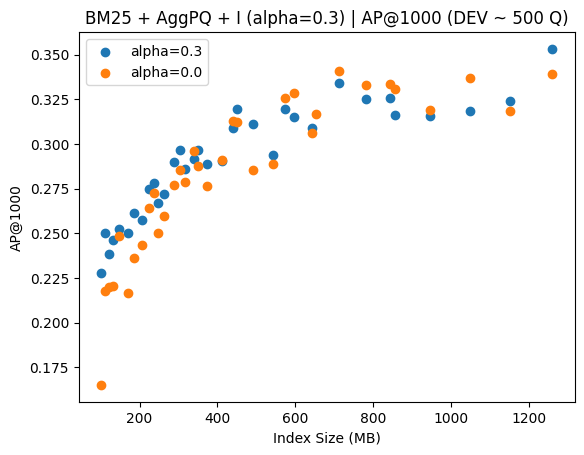

In [19]:
display_score_by_index_size(ap_scores, ap_scores_baseline, index_sizes, index_sizes_baseline, 'BM25 + AggPQ + I (alpha=0.3) | AP@1000 (DEV ~ 500 Q)', 'AP@1000',
                           save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_aggpq_app1000_plot.png')

# BM25 + TctColBertPQ - Analysis

In [33]:
data_bm25_tct = data[(data["Model"] == "BM25 + TctColBertPQ") & (data["Alpha"] == 0.1)]
row_dict_tct = {'256': 0, '512': 1, '1024': 2, '2048': 3, '4096': 4}
col_dict_tct = {'8': 0, '16': 1, '24': 2, '32': 3, '48': 4, '64': 5, '96': 6}
ndcg_scores_tct = np.zeros((5, 7))
rr_scores_tct = np.zeros_like(ndcg_scores)
ap_scores_tct = np.zeros_like(ndcg_scores)
index_sizes_tct = np.zeros_like(ndcg_scores)


for (idx, row) in data_bm25_tct.iterrows():
    tbl_row = row_dict[str(row.K)]
    tbl_col = col_dict[str(row.M)]

    ndcg_scores_tct[tbl_row, tbl_col] = row['nDCG@10'] if row['nDCG@10'] >= 0 else None
    rr_scores_tct[tbl_row, tbl_col] = row['RR@10'] if row['RR@10'] >= 0 else None
    ap_scores_tct[tbl_row, tbl_col] = row['AP@1000'] if row['AP@1000'] >= 0 else None
    index_sizes_tct[tbl_row, tbl_col] = row['Dense Index Size (MB)'] if row['Dense Index Size (MB)'] >= 0 else None

In [34]:
data_bm25_tct_baseline = data[(data["Model"] == "BM25 + TctColBertPQ") & (data["Alpha"] == 0.0)]
row_dict_tct_baseline = {'256': 0, '512': 1, '1024': 2, '2048': 3, '4096': 4}
col_dict_tct_baseline = {'8': 0, '16': 1, '24': 2, '32': 3, '48': 4, '64': 5, '96': 6}
ndcg_scores_tct_baseline = np.zeros((5, 7))
rr_scores_tct_baseline = np.zeros_like(ndcg_scores_tct_baseline)
ap_scores_tct_baseline = np.zeros_like(ndcg_scores_tct_baseline)
index_sizes_tct_baseline = np.zeros_like(ndcg_scores_tct_baseline)


for (idx, row) in data_bm25_tct_baseline.iterrows():
    tbl_row = row_dict_tct_baseline[str(row.K)]
    tbl_col = col_dict_tct_baseline[str(row.M)]

    ndcg_scores_tct_baseline[tbl_row, tbl_col] = row['nDCG@10'] if row['nDCG@10'] >= 0 else None
    rr_scores_tct_baseline[tbl_row, tbl_col] = row['RR@10'] if row['RR@10'] >= 0 else None
    ap_scores_tct_baseline[tbl_row, tbl_col] = row['AP@1000'] if row['AP@1000'] >= 0 else None
    index_sizes_tct_baseline[tbl_row, tbl_col] = row['Dense Index Size (MB)'] if row['Dense Index Size (MB)'] >= 0 else None

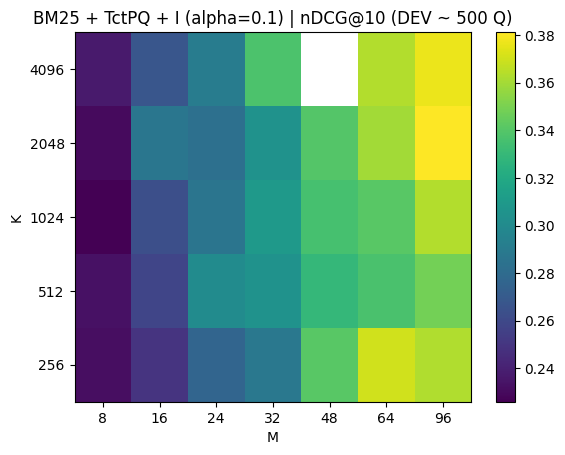

In [38]:
display_color_mesh(ndcg_scores_tct, 'BM25 + TctPQ + I (alpha=0.1) | nDCG@10 (DEV ~ 500 Q)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_tctpq_ndcg10_grid.png')

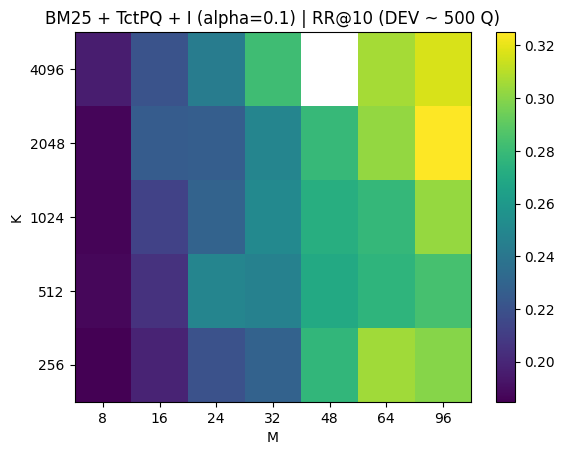

In [39]:
display_color_mesh(rr_scores_tct, 'BM25 + TctPQ + I (alpha=0.1) | RR@10 (DEV ~ 500 Q)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_tctpq_rr10_grid.png')

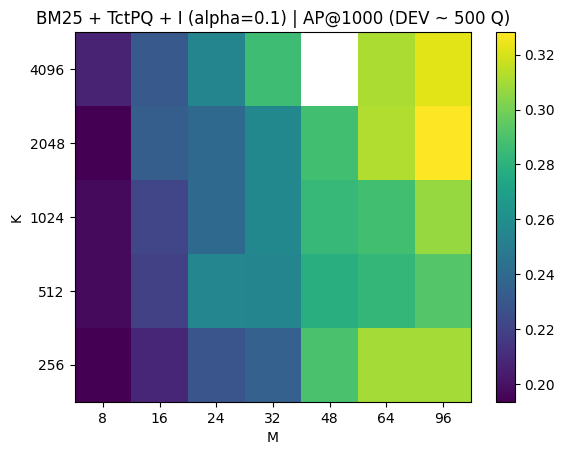

In [40]:
display_color_mesh(ap_scores_tct, 'BM25 + TctPQ + I (alpha=0.1) | AP@1000 (DEV ~ 500 Q)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_tctpq_ap1000_grid.png')

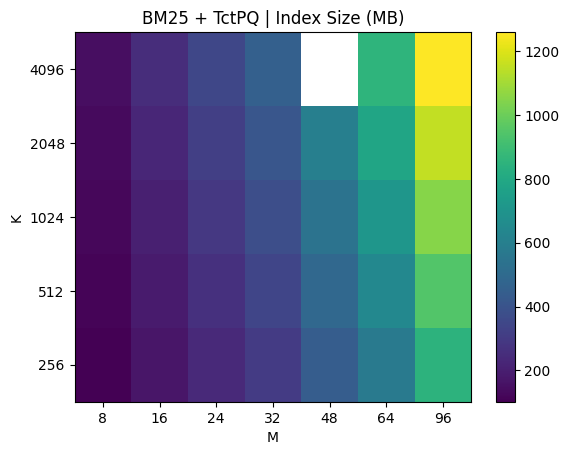

In [41]:
display_color_mesh(index_sizes_tct, 'BM25 + TctPQ | Index Size (MB)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_tctpq_index_size_grid.png')

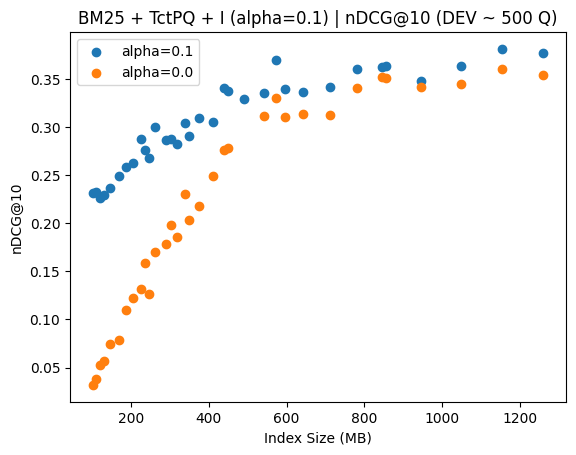

In [48]:
display_score_by_index_size(ndcg_scores_tct, ndcg_scores_tct_baseline, index_sizes, index_sizes_baseline, 'BM25 + TctPQ + I (alpha=0.1) | nDCG@10 (DEV ~ 500 Q)', 'nDCG@10',
                           save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_tctpq_ndcg10_plot.png', alpha_label='0.1')

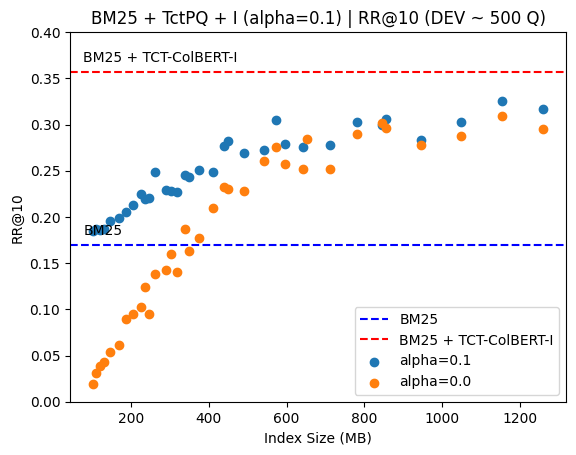

In [39]:
display_score_by_index_size_with_lines(rr_scores_tct, rr_scores_tct_baseline, index_sizes, index_sizes_baseline, 'BM25 + TctPQ + I (alpha=0.1) | RR@10 (DEV ~ 500 Q)', 'RR@10',
                            lines=[(0.170, 'BM25', 'blue', '--', True),
                                (0.357, 'BM25 + TCT-ColBERT-I', 'red', '--', True)],
                           limits=(0, 0.4),
                           save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_tctpq_rr10_plot.png', alpha_label='0.1')

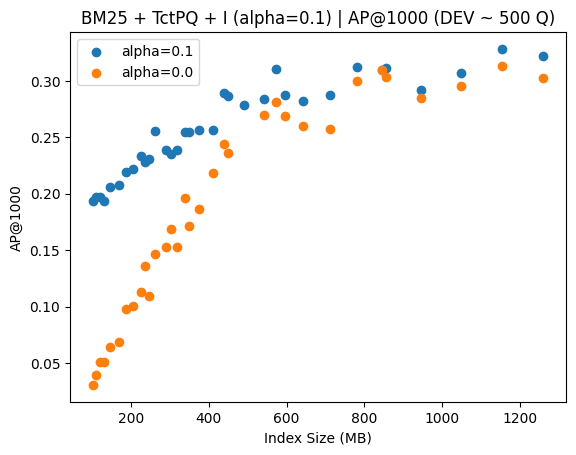

In [51]:
display_score_by_index_size(ap_scores_tct, ap_scores_tct_baseline, index_sizes, index_sizes_baseline, 'BM25 + TctPQ + I (alpha=0.1) | AP@1000 (DEV ~ 500 Q)', 'AP@1000',
                           save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch_interpolation/plots/bm25_tctpq_ap1000_plot.png', alpha_label='0.1')